In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Data prep
from sklearn.model_selection import train_test_split

# Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2

# Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [71]:
# Метрики для регрессионной модели

def evaluate_regression(y, y_pred):

    '''
    Prints the most common evaluation metrics for regression
    '''

    mae = MAE(y, y_pred)
    mse = MSE(y, y_pred)
    rmse = mse ** (1/2)
    r2 = R2(y, y_pred)

    print('Regression result')
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")

In [72]:
# Метрики для классификационной модели
def evaluate_classification(y, y_proba, threshold = 0.5):

    '''
    Prints the most common evaluation metrics for regression
    '''
    y_pred = [1 if y > threshold else 0 for y in y_proba]

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_proba)

    print('Classification result')
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1:        {f1:.4f}")
    print(f"ROC AUC:   {roc_auc:.4f}")

Text(0.5, 1.0, 'Distribution of the features')

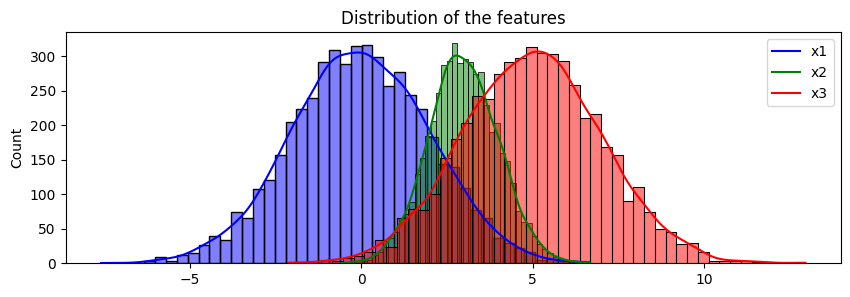

In [73]:
# Обучаем регрессионную модель
# y = a1*x1 + a2*x2 + a3*x3 + b
# Sample size
size = 5000
# Create random samples
x1 = np.random.normal(loc = 0, scale = 2, size = size)
x2 = np.random.normal(loc = 3, scale = 1, size = size)
x3 = np.random.normal(loc = 5, scale = 2, size = size)
# Visualize them
plt.figure(figsize = (10,3))
sns.histplot(x1, kde = True, color = 'b')
sns.histplot(x2, kde = True, color = 'g')
sns.histplot(x3, kde = True, color = 'r')
plt.legend(["x1", "x2", "x3"])
plt.title("Distribution of the features")

Text(0.5, 1.0, 'Distribution of the features')

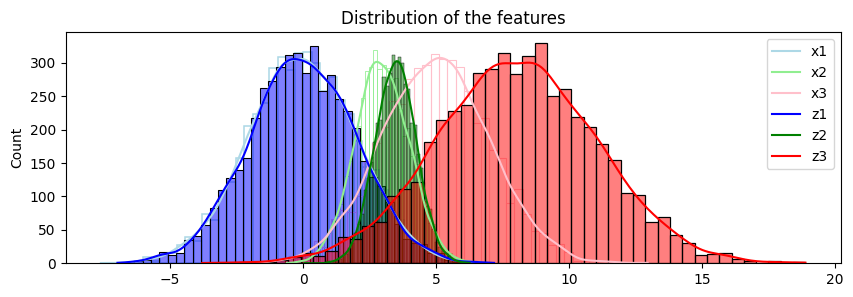

In [74]:
# Create random samples
z1 = np.random.normal(loc = 0, scale = 2, size = size)  # как x1
z2 = np.random.normal(loc = 3.5, scale = 0.75, size = size)  # x2 with slight changes on scale and loc
z3 = np.random.normal(loc = 8, scale = 3, size = size)  # x3 with large changes on scale and loc
# Visualize them
plt.figure(figsize = (10,3))
sns.histplot(x1, kde = True, color = 'lightblue', fill = False)
sns.histplot(x2, kde = True, color = 'lightgreen', fill = False)
sns.histplot(x3, kde = True, color = 'pink', fill = False)
sns.histplot(z1, kde = True, color = 'b')
sns.histplot(z2, kde = True, color = 'g')
sns.histplot(z3, kde = True, color = 'r')
plt.legend(["x1", "x2", "x3", "z1", "z2", "z3"])
plt.title("Distribution of the features")

Text(0.5, 0.98, 'Regression curve for each feature')

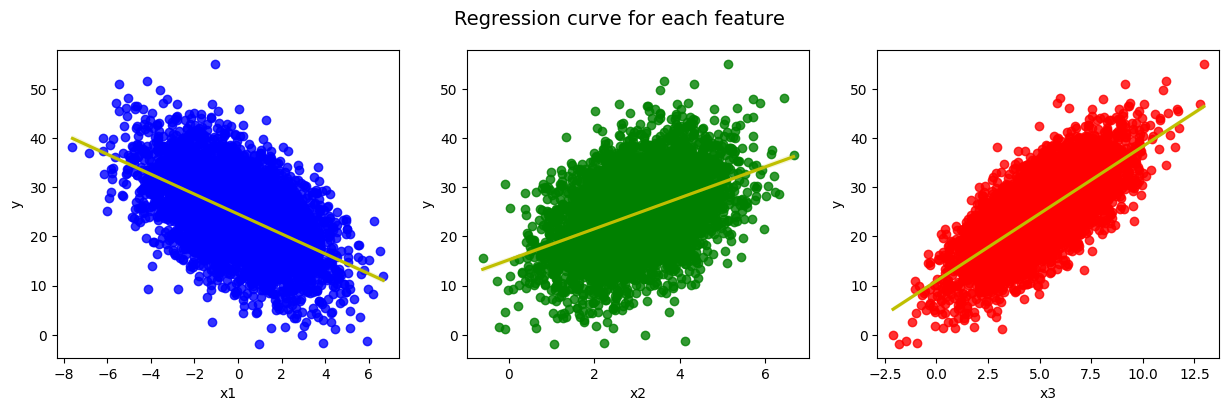

In [75]:
# yes, a2 = pi, a3 = e and b = phi
y = [-2*x1 + 3.1415*x2 + 2.7183*x3 + 1.6180 for (x1, x2, x3) in zip(x1,x2,x3)]
fig = plt.figure(figsize = (15,4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.regplot(x = x1, y = y, ax = ax1, scatter_kws={"color": "b"}, line_kws={"color": "y"})
sns.regplot(x = x2, y = y, ax = ax2, scatter_kws={"color": "g"}, line_kws={"color": "y"})
sns.regplot(x = x3, y = y, ax = ax3, scatter_kws={"color": "r"}, line_kws={"color": "y"})
ax1.set_ylabel("y")
ax2.set_ylabel("y")
ax3.set_ylabel("y")
ax1.set_xlabel("x1")
ax2.set_xlabel("x2")
ax3.set_xlabel("x3")
fig.suptitle("Regression curve for each feature", fontsize = 14)

In [76]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y' : y})
X = df.drop(columns = 'y')
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [77]:
# Регрессия
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_regression(y_test, y_pred)


Regression result
MAE:  1.3864
MSE:  3.0820
RMSE: 1.7556
R2:   0.9463


Text(0.5, 0.98, 'Regression curve for each feature')

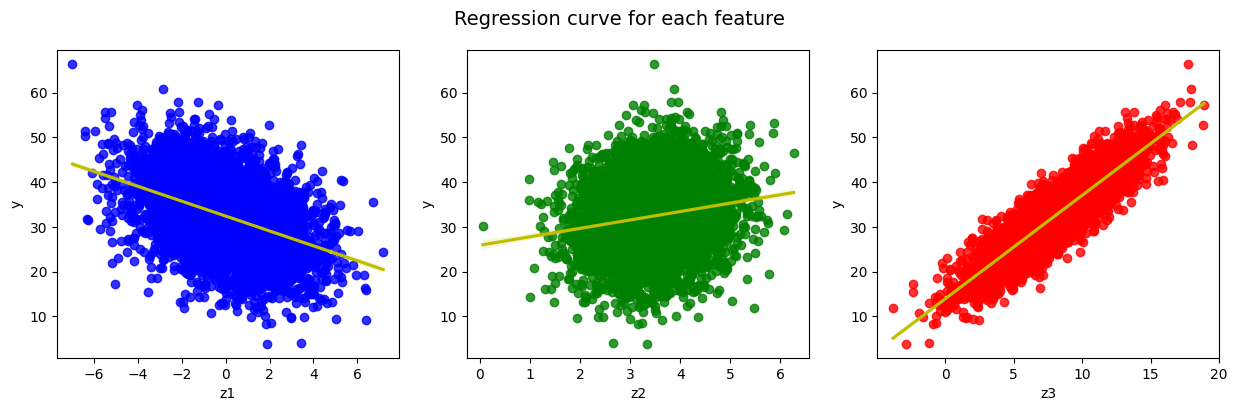

In [78]:
Z = pd.DataFrame({'x1': z1, 'x2': z2, 'x3': z3})
z_pred = model.predict(Z)
fig = plt.figure(figsize = (15,4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.regplot(x = z1, y = z_pred, ax = ax1, scatter_kws={"color": "b"}, line_kws={"color": "y"})
sns.regplot(x = z2, y = z_pred, ax = ax2, scatter_kws={"color": "g"}, line_kws={"color": "y"})
sns.regplot(x = z3, y = z_pred, ax = ax3, scatter_kws={"color": "r"}, line_kws={"color": "y"})
ax1.set_ylabel("y")
ax2.set_ylabel("y")
ax3.set_ylabel("y")
ax1.set_xlabel("z1")
ax2.set_xlabel("z2")
ax3.set_xlabel("z3")
fig.suptitle("Regression curve for each feature", fontsize = 14)

In [79]:
# PSI
def psi(score_initial, score_new, num_bins = 10, mode = 'fixed'):

    eps = 1e-4

    # Sort the data
    score_initial.sort()
    score_new.sort()

    # Prepare the bins
    min_val = min(min(score_initial), min(score_new))
    max_val = max(max(score_initial), max(score_new))
    if mode == 'fixed':
        bins = [min_val + (max_val - min_val)*(i)/num_bins for i in range(num_bins+1)]
    elif mode == 'quantile':
        bins = pd.qcut(score_initial, q = num_bins, retbins = True)[1] # Create the quantiles based on the initial population
    else:
        raise ValueError(f"Mode \'{mode}\' not recognized. Your options are \'fixed\' and \'quantile\'")
    bins[0] = min_val - eps # Correct the lower boundary
    bins[-1] = max_val + eps # Correct the higher boundary


    # Bucketize the initial population and count the sample inside each bucket
    bins_initial = pd.cut(score_initial, bins = bins, labels = range(1,num_bins+1))
    df_initial = pd.DataFrame({'initial': score_initial, 'bin': bins_initial})
    grp_initial = df_initial.groupby('bin').count()
    grp_initial['percent_initial'] = grp_initial['initial'] / sum(grp_initial['initial'])

    # Bucketize the new population and count the sample inside each bucket
    bins_new = pd.cut(score_new, bins = bins, labels = range(1,num_bins+1))
    df_new = pd.DataFrame({'new': score_new, 'bin': bins_new})
    grp_new = df_new.groupby('bin').count()
    grp_new['percent_new'] = grp_new['new'] / sum(grp_new['new'])

    # Compare the bins to calculate PSI
    psi_df = grp_initial.join(grp_new, on = "bin", how = "inner")

    # Add a small value for when the percent is zero
    psi_df['percent_initial'] = psi_df['percent_initial'].apply(lambda x: eps if x == 0 else x)
    psi_df['percent_new'] = psi_df['percent_new'].apply(lambda x: eps if x == 0 else x)

    # Calculate the psi
    psi_df['psi'] = (psi_df['percent_initial'] - psi_df['percent_new']) * np.log(psi_df['percent_initial'] / psi_df['percent_new'])

    # Return the psi values
    return psi_df['psi'].values

In [80]:
# mode fixed
psi_values_fixed = psi(y_pred, z_pred, mode = 'fixed')
psi_values_fixed
np.mean(psi_values_fixed)

/tmp/ipython-input-111781703.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_initial = df_initial.groupby('bin').count()
/tmp/ipython-input-111781703.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_new = df_new.groupby('bin').count()


np.float64(0.15803047997276048)

In [81]:
# quantile
psi_values_quantile = psi(y_pred, z_pred, mode = 'quantile')
psi_values_quantile
np.mean(psi_values_quantile)

/tmp/ipython-input-111781703.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_initial = df_initial.groupby('bin').count()
/tmp/ipython-input-111781703.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_new = df_new.groupby('bin').count()


np.float64(0.11676123106780238)

In [82]:
# Сохранить данные для расчета CSI
df_test = X_test.copy()
df_test['y'] = y_test
df_test['pred'] = y_pred
Z['pred'] = z_pred
df_test.to_csv("data_test_regression.csv", sep = ";", index = False)
Z.to_csv("Z_regression.csv", sep = ";", index = False)

<Axes: >

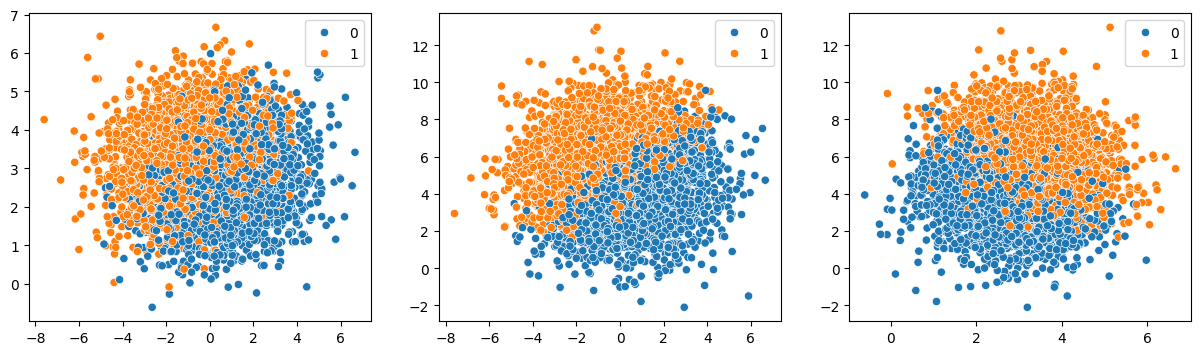

In [83]:
# Классификационная модель
# yes, a2 = pi, a3 = e and b = phi
y = [-2*x1 + 3.1415*x2 + 2.7183*x3 + 1.6180 for (x1, x2, x3) in zip(x1,x2,x3)]
c = np.median(y)
y = [1 if a > c else 0 for a in y]
plt.figure(figsize = (15,4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x = x1, y = x2, hue = y, ax = ax1)
sns.scatterplot(x = x1, y = x3, hue = y, ax = ax2)
sns.scatterplot(x = x2, y = x3, hue = y, ax = ax3)

In [84]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y' : y})
X = df.drop(columns = 'y')
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Train the classifier
# model = LogisticRegression()
model = GaussianNB()
# model = RandomForestClassifier()
# model = XGBClassifier()
model.fit(X_train, y_train)

GaussianNB()

In [85]:
y_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
evaluate_classification(y_test, y_proba[:,1])

Classification result
Accuracy:  0.9670
Precision: 0.9743
Recall:    0.9609
F1:        0.9676
ROC AUC:   0.9971


<Axes: >

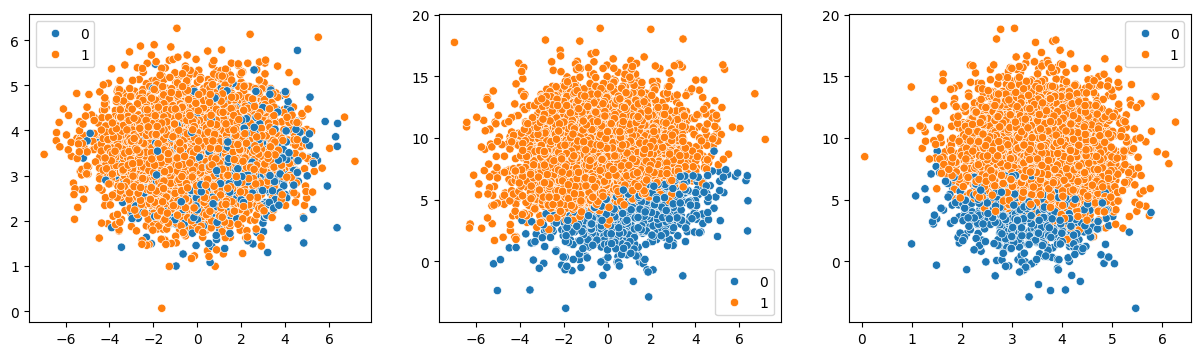

In [86]:
Z = pd.DataFrame({'x1': z1, 'x2': z2, 'x3': z3})
z_proba = model.predict_proba(Z)
z_pred = model.predict(Z)
plt.figure(figsize = (15,4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x = z1, y = z2, hue = z_pred, ax = ax1)
sns.scatterplot(x = z1, y = z3, hue = z_pred, ax = ax2)
sns.scatterplot(x = z2, y = z3, hue = z_pred, ax = ax3)

In [87]:
psi_values_fixed = psi(y_proba[:,1], z_proba[:,1], mode = 'fixed')
psi_values_fixed
np.mean(psi_values_fixed)


/tmp/ipython-input-111781703.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_initial = df_initial.groupby('bin').count()
/tmp/ipython-input-111781703.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_new = df_new.groupby('bin').count()


np.float64(0.11088230864771757)

In [88]:
psi_values_quantile = psi(y_proba[:,1], z_proba[:,1], mode = 'quantile')
psi_values_quantile
np.mean(psi_values_quantile)


/tmp/ipython-input-111781703.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_initial = df_initial.groupby('bin').count()
/tmp/ipython-input-111781703.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_new = df_new.groupby('bin').count()


np.float64(0.12337381789646802)

In [89]:
# Сoхранение данных для расчетов CSI
df_test = X_test.copy()
df_test['y'] = y_test
df_test['pred'] = y_pred
df_test['proba'] = y_proba[:,1]
Z['pred'] = z_pred
Z['proba'] = z_proba[:,1]
df_test.to_csv("data_test_classification.csv", sep = ";", index = False)
Z.to_csv("Z_classification.csv", sep = ";", index = False)